Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge


Read in dataset

In [2]:
data = pd.read_csv('cpsaat_2015_2021.csv')


Data transformation for modeling

In [3]:
data.head(15).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

C:\Users\RobDewan\AppData\Local\Temp\ipykernel_12824\826336969.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data.head(15).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


Civilian noninstitutional population,Civilian labor force,Participation rate,Employed,Employment-population ratio,Unemployed,Unemployment rate,Sex,Race,Year
"24,175","10,971",45.400000,"10,098",41.800000,873,8.000000,nan,nan,2015
"61,712","35,322",57.200000,"33,402",54.100000,"1,920",5.400000,nan,nan,2015
"56,263","37,481",66.600000,"35,785",63.600000,"1,695",4.500000,nan,nan,2015
"35,326","22,706",64.300000,"21,573",61.100000,"1,134",5.000000,nan,nan,2015
"20,937","14,774",70.600000,"14,213",67.900000,562,3.800000,nan,nan,2015
"70,061","52,133",74.400000,"50,792",72.500000,"1,341",2.600000,nan,nan,2015
"44,086","32,684",74.100000,"31,772",72.100000,912,2.800000,nan,nan,2015
"25,975","19,449",74.900000,"19,020",73.200000,429,2.200000,nan,nan,2015
"12,137","7,081",58.300000,"6,573",54.200000,507,7.200000,Men,nan,2015
"30,388","20,416",67.200000,"19,302",63.500000,"1,114",5.500000,Men,nan,2015


In [4]:
data.shape

(392, 10)

In [5]:
data.describe()

,Participation rate,Employment-population ratio,Unemployment rate,Year
count,392.000000,392.000000,392.000000,392.000000
mean,66.596173,63.677296,4.653061,2018.000000
std,11.037426,11.425293,2.613949,2.002556
min,32.300000,28.200000,1.700000,2015.000000
25%,60.775000,57.550000,2.800000,2016.000000
50%,69.600000,66.900000,3.900000,2018.000000
75%,74.125000,72.025000,5.625000,2020.000000
max,81.800000,80.200000,16.600000,2021.000000


In [6]:
data.isnull().sum()

Civilian noninstitutional population      0
Civilian labor force                      0
Participation rate                        0
Employed                                  0
Employment-population ratio               0
Unemployed                                0
Unemployment rate                         0
Sex                                     280
Race                                    168
Year                                      0
dtype: int64

In [7]:
data = data.drop(['Sex'], axis = 1)

In [8]:
data.isnull().sum()

Civilian noninstitutional population      0
Civilian labor force                      0
Participation rate                        0
Employed                                  0
Employment-population ratio               0
Unemployed                                0
Unemployment rate                         0
Race                                    168
Year                                      0
dtype: int64

In [9]:
data['Race'].value_counts()

White                           56
Black or African American       56
Asian                           56
Hispanic or Latino ethnicity    56
Name: Race, dtype: int64

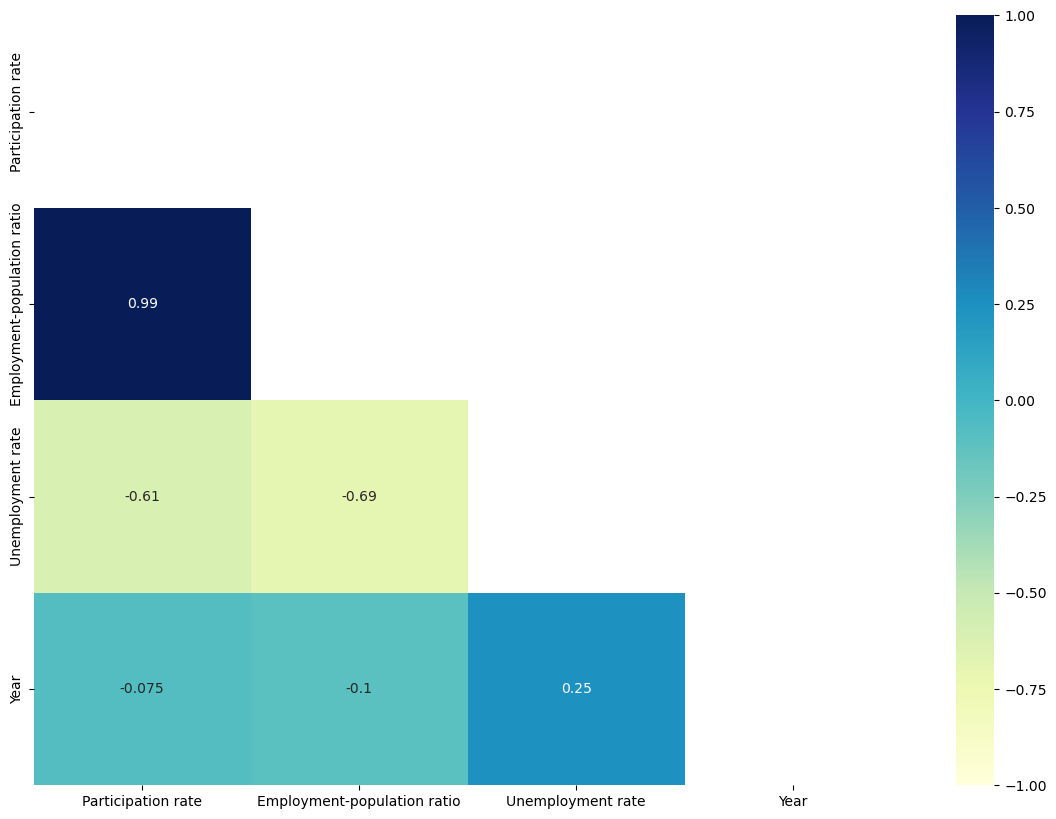

In [10]:
plt.figure(figsize= (14,10))

corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(data = corr,
            annot = True,
            mask = mask,
            cmap = "YlGnBu",
            vmin = -1,
            vmax = 1);

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    object 
 1   Civilian labor force                  392 non-null    object 
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    object 
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    object 
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  224 non-null    object 
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 27.7+ KB


In [12]:
data['Civilian noninstitutional population'] = data['Civilian noninstitutional population'].str.replace(',', '')
data['Civilian noninstitutional population']

0      24175
1      61712
2      56263
3      35326
4      20937
       ...  
387     4761
388     3090
389     7432
390     5174
391     2259
Name: Civilian noninstitutional population, Length: 392, dtype: object

In [13]:
data['Civilian labor force'] = data['Civilian labor force'].str.replace(',', '')
data['Civilian labor force']

0      10971
1      35322
2      37481
3      22706
4      14774
       ...  
387     3384
388     2270
389     5880
390     4064
391     1816
Name: Civilian labor force, Length: 392, dtype: object

In [14]:
data['Employed'] = data['Employed'].str.replace(',', '')
data['Employed']

0      10098
1      33402
2      35785
3      21573
4      14213
       ...  
387     3175
388     2134
389     5652
390     3888
391     1764
Name: Employed, Length: 392, dtype: object

In [15]:
data['Unemployed'] = data['Unemployed'].str.replace(',', '')
data['Unemployed']

0       873
1      1920
2      1695
3      1134
4       562
       ... 
387     209
388     137
389     228
390     176
391      53
Name: Unemployed, Length: 392, dtype: object

In [16]:
data['Participation rate'] = data['Participation rate'].astype(str).astype(float)

In [17]:
data['Civilian labor force'] = data['Civilian labor force'].astype(str).astype(int)
data['Civilian noninstitutional population'] = data['Civilian noninstitutional population'].astype(str).astype(int)
data['Employed'] = data['Employed'].astype(str).astype(int)
data['Unemployed'] = data['Unemployed'].astype(str).astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    int32  
 1   Civilian labor force                  392 non-null    int32  
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    int32  
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    int32  
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  224 non-null    object 
 8   Year                                  392 non-null    int64  
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 21.6+ KB


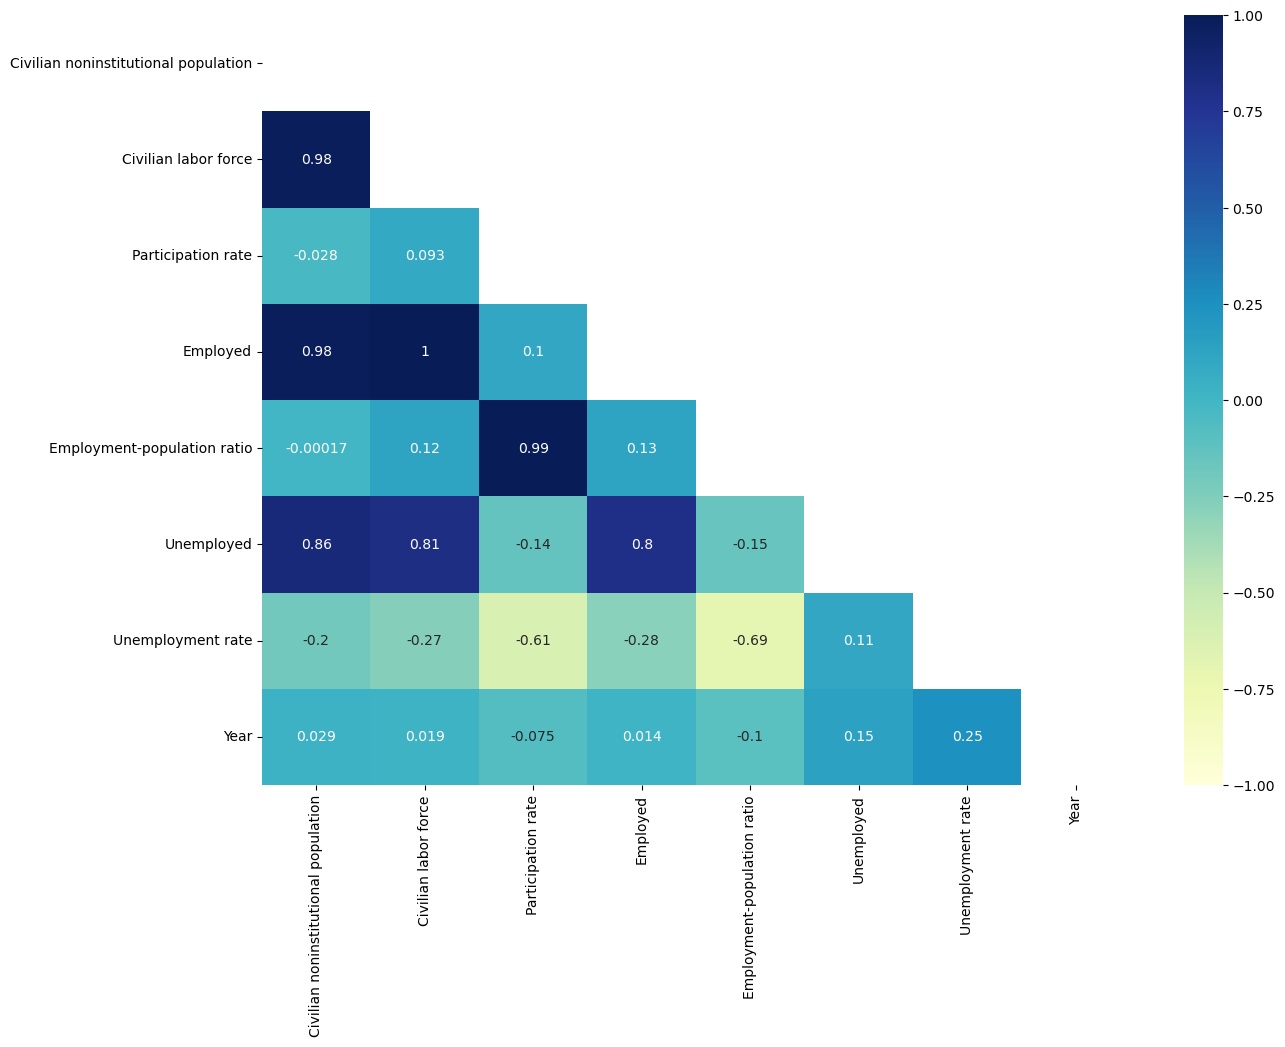

In [19]:
plt.figure(figsize= (14,10))

corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(data = corr,
            annot = True,
            mask = mask,
            cmap = "YlGnBu",
            vmin = -1,
            vmax = 1);

In [20]:
dummy_data = pd.get_dummies(data, columns= ['Race'])

In [21]:
df = pd.concat([data, dummy_data], axis = 1)
df.head(10)

,Civilian noninstitutional population,Civilian labor force,Participation rate,Employed,Employment-population ratio,Unemployed,Unemployment rate,Race,Year,Civilian noninstitutional population,...,Participation rate,Employed,Employment-population ratio,Unemployed,Unemployment rate,Year,Race_Asian,Race_Black or African American,Race_Hispanic or Latino ethnicity,Race_White
0,24175,10971,45.4,10098,41.8,873,8.0,NaN,2015,24175,...,45.4,10098,41.8,873,8.0,2015,0,0,0,0
1,61712,35322,57.2,33402,54.1,1920,5.4,NaN,2015,61712,...,57.2,33402,54.1,1920,5.4,2015,0,0,0,0
2,56263,37481,66.6,35785,63.6,1695,4.5,NaN,2015,56263,...,66.6,35785,63.6,1695,4.5,2015,0,0,0,0
3,35326,22706,64.3,21573,61.1,1134,5.0,NaN,2015,35326,...,64.3,21573,61.1,1134,5.0,2015,0,0,0,0
4,20937,14774,70.6,14213,67.9,562,3.8,NaN,2015,20937,...,70.6,14213,67.9,562,3.8,2015,0,0,0,0
5,70061,52133,74.4,50792,72.5,1341,2.6,NaN,2015,70061,...,74.4,50792,72.5,1341,2.6,2015,0,0,0,0
6,44086,32684,74.1,31772,72.1,912,2.8,NaN,2015,44086,...,74.1,31772,72.1,912,2.8,2015,0,0,0,0
7,25975,19449,74.9,19020,73.2,429,2.2,NaN,2015,25975,...,74.9,19020,73.2,429,2.2,2015,0,0,0,0
8,12137,7081,58.3,6573,54.2,507,7.2,NaN,2015,12137,...,58.3,6573,54.2,507,7.2,2015,0,0,0,0
9,30388,20416,67.2,19302,63.5,1114,5.5,NaN,2015,30388,...,67.2,19302,63.5,1114,5.5,2015,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    int32  
 1   Civilian labor force                  392 non-null    int32  
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    int32  
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    int32  
 6   Unemployment rate                     392 non-null    float64
 7   Race                                  224 non-null    object 
 8   Year                                  392 non-null    int64  
 9   Civilian noninstitutional population  392 non-null    int32  
 10  Civilian labor force                  392 non-null    int32  
 11  Participation rate 

In [23]:
df = df.drop(['Race'], axis = 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian noninstitutional population  392 non-null    int32  
 1   Civilian labor force                  392 non-null    int32  
 2   Participation rate                    392 non-null    float64
 3   Employed                              392 non-null    int32  
 4   Employment-population ratio           392 non-null    float64
 5   Unemployed                            392 non-null    int32  
 6   Unemployment rate                     392 non-null    float64
 7   Year                                  392 non-null    int64  
 8   Civilian noninstitutional population  392 non-null    int32  
 9   Civilian labor force                  392 non-null    int32  
 10  Participation rate                    392 non-null    float64
 11  Employed           

Features Separating

In [25]:
X = df.drop(['Unemployment rate','Unemployed', 'Employed', 'Employment-population ratio'], axis=1)
y = df['Unemployment rate']

Scaling our Features

In [26]:
scaler = StandardScaler()

In [27]:
X_scaled = scaler.fit_transform(X)

In [28]:
pd.DataFrame(X_scaled).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.250793,-0.162890,-1.922845,-1.5,0.250793,-0.162890,-1.922845,-1.5,-0.408248,-0.408248,-0.408248,-0.408248
1,2.309825,1.792629,-0.852389,-1.5,2.309825,1.792629,-0.852389,-1.5,-0.408248,-0.408248,-0.408248,-0.408248
2,2.010929,1.966009,0.000347,-1.5,2.010929,1.966009,0.000347,-1.5,-0.408248,-0.408248,-0.408248,-0.408248
3,0.862463,0.779495,-0.208301,-1.5,0.862463,0.779495,-0.208301,-1.5,-0.408248,-0.408248,-0.408248,-0.408248
4,0.073178,0.142512,0.363214,-1.5,0.073178,0.142512,0.363214,-1.5,-0.408248,-0.408248,-0.408248,-0.408248


Split Dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4)

Linear Regression 

In [30]:
reg = linear_model.LinearRegression()

In [31]:
reg.fit(X_train , y_train)

LinearRegression()

In [32]:
reg.score(X_train , y_train)

0.5829368473118681

In [33]:
LRAcc= reg.score(X_test , y_test)
LRAcc

0.5414024159979209

In [34]:
reg.coef_

array([[-0.62029793,  0.59556448, -0.98229106,  0.23825922, -0.62029793,
         0.59556448, -0.98229106,  0.23825922,  0.06918395,  0.9213514 ,
         0.56651268, -0.18966669],
       [-0.62029793,  0.59556448, -0.98229106,  0.23825922, -0.62029793,
         0.59556448, -0.98229106,  0.23825922,  0.06918395,  0.9213514 ,
         0.56651268, -0.18966669]])

In [35]:
assert reg.coef_[0].all() == reg.coef_[1].all() # Both arrays are identitcal
pd.DataFrame(reg.coef_[0], index=X.columns, columns= ['Linear Regression Coefficient'])

,Linear Regression Coefficient
Civilian noninstitutional population,-0.620298
Civilian labor force,0.595564
Participation rate,-0.982291
Year,0.238259
Civilian noninstitutional population,-0.620298
Civilian labor force,0.595564
Participation rate,-0.982291
Year,0.238259
Race_Asian,0.069184
Race_Black or African American,0.921351


In [36]:
y_pred = reg.predict(X_test)
df2 = pd.DataFrame(y_pred)
y_predicted = df2.iloc[:, 0]

In [37]:
x2 = pd.DataFrame(X)
x2.iloc[:, 0]

0      24175
1      61712
2      56263
3      35326
4      20937
       ...  
387     4761
388     3090
389     7432
390     5174
391     2259
Name: Civilian noninstitutional population, Length: 392, dtype: int32

In [38]:
y2 = pd.DataFrame(y)
y2.iloc[:, 0]

0      8.0
1      5.4
2      4.5
3      5.0
4      3.8
      ... 
387    6.2
388    6.0
389    3.9
390    4.3
391    2.9
Name: Unemployment rate, Length: 392, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

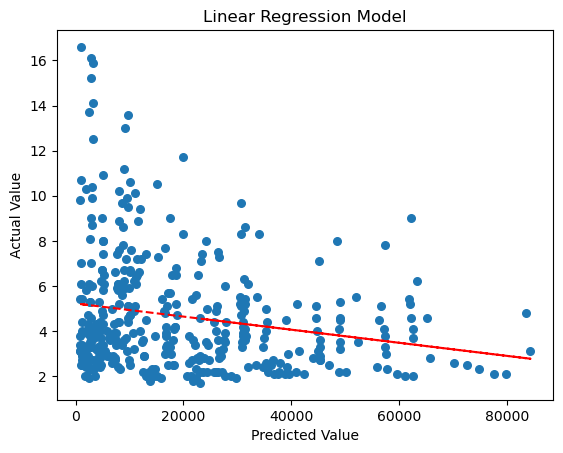

In [39]:
plt.scatter(x = x2.iloc[:, 0], y = y2.iloc[:, 0], s=30)

x = x2.iloc[:, 0]
y = y2.iloc[:, 0]
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.show

Decision Tree Regression

In [40]:
DTreg = DecisionTreeRegressor(random_state = 0) 

In [41]:
DTreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [42]:
DTreg.score(X_train, y_train)

1.0

In [43]:
DTAcc = DTreg.score(X_test, y_test)
DTAcc

0.7767003702629047

In [44]:
y_pred_2 = DTreg.predict(X_test)

In [45]:
x3 = pd.DataFrame(X)
x3.iloc[:, 0]

0      24175
1      61712
2      56263
3      35326
4      20937
       ...  
387     4761
388     3090
389     7432
390     5174
391     2259
Name: Civilian noninstitutional population, Length: 392, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

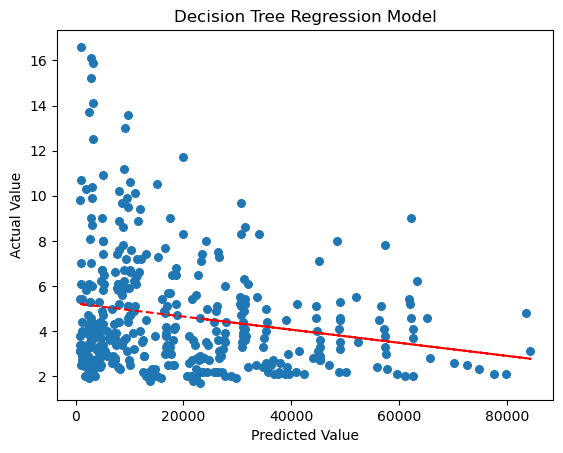

In [46]:
plt.scatter(x = x3.iloc[:, 0], y = y2.iloc[:, 0], s=30)

x = x3.iloc[:, 0]
y = y2.iloc[:, 0]
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Decision Tree Regression Model')
plt.show

K Nearest Neighbors Regression

In [47]:
knn_model = KNeighborsRegressor(n_neighbors=4, metric='manhattan').fit(X_train, y_train)

In [48]:
knn_model.score(X_train, y_train)
knn_model.metric

'manhattan'

In [49]:
knnAcc = knn_model.score(X_test, y_test)
knnAcc

0.6395690149160278

In [50]:
y_pred_3 = knn_model.predict(X_test)


In [51]:
x4 =pd.DataFrame(X)
x4.iloc[:, 0]

0      24175
1      61712
2      56263
3      35326
4      20937
       ...  
387     4761
388     3090
389     7432
390     5174
391     2259
Name: Civilian noninstitutional population, Length: 392, dtype: int32

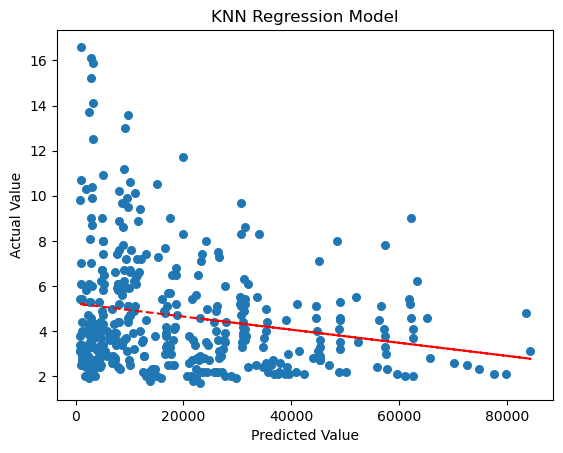

In [52]:
plt.scatter(x = x4.iloc[:, 0], y = y2.iloc[:, 0], s=30)

x = x4.iloc[:, 0]
y = y2.iloc[:, 0]
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('KNN Regression Model')
plt.show();

Ridge Regression

In [53]:
ridge = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)

In [54]:
ridge.fit(X_train, y_train)

c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Ridge(alpha=0.5, normalize=False, random_state=42)

In [55]:
ridge.score(X_train, y_train)

0.5828962798705991

In [56]:
RidAcc = ridge.score(X_test, y_test)
RidAcc

0.5418758699091102

In [57]:
ridge.coef_

array([[-0.55306803,  0.52769858, -0.97260133,  0.23792296, -0.55306803,
         0.52769858, -0.97260133,  0.23792296,  0.07005175,  0.91952815,
         0.56198016, -0.19049605],
       [-0.55306803,  0.52769858, -0.97260133,  0.23792296, -0.55306803,
         0.52769858, -0.97260133,  0.23792296,  0.07005175,  0.91952815,
         0.56198016, -0.19049605]])

In [58]:
assert ridge.coef_[0].all() == ridge.coef_[1].all() # Both arrays are identical
pd.DataFrame(ridge.coef_[0], index=X.columns, columns=['Ridge Regression Coefficient'])

,Ridge Regression Coefficient
Civilian noninstitutional population,-0.553068
Civilian labor force,0.527699
Participation rate,-0.972601
Year,0.237923
Civilian noninstitutional population,-0.553068
Civilian labor force,0.527699
Participation rate,-0.972601
Year,0.237923
Race_Asian,0.070052
Race_Black or African American,0.919528


In [59]:
y_pred_4 = ridge.predict(X_test)

In [60]:
x5 =pd.DataFrame(X)
x5.iloc[:, 0]

0      24175
1      61712
2      56263
3      35326
4      20937
       ...  
387     4761
388     3090
389     7432
390     5174
391     2259
Name: Civilian noninstitutional population, Length: 392, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

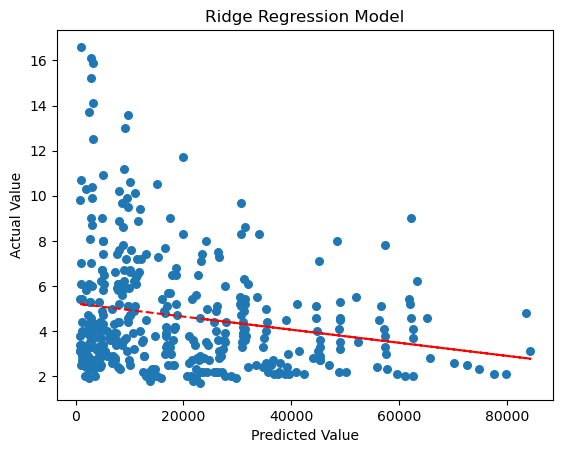

In [61]:
plt.scatter(x = x5.iloc[:, 0], y = y2.iloc[:, 0], s=30)

x = x5.iloc[:, 0]
y = y2.iloc[:, 0]
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Ridge Regression Model')
plt.show